In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
tf.reset_default_graph()  # Xavier 가중치 초기 에러 방지

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
#Simple CNN 
#input, (conv1, pool1), (conv2, pool2) -> FC (Fully connected layer)
#          (Layer1)         (Layer2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Learning started. It takes sometime
Epoch: 0001 cost = 0.148420247
Epoch: 0002 cost = 0.052591004
Epoch: 0003 cost = 0.040483710
Epoch: 0004 cost = 0.031618037
Epoch: 0005 cost = 0.029134956
Epoch: 0006 cost = 0.023570700
Epoch: 0007 cost = 0.023807974
Epoch: 0008 cost = 0.020599903
Epoch: 0009 cost = 0.020037998
Epoch: 0010 cost = 0.022522975
Epoch: 0011 cost = 0.020549903
Epoch: 0012 cost = 0.023803369
Epoch: 0013 cost = 0.016520976
Epoch: 0014 cost = 0.021782308
Epoch: 0015 cost = 0.015781981
Learning Finished!
Accuracy: 0.9852
Label: [8]
Prediction: [8]


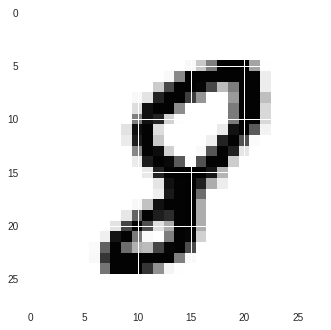

In [5]:
tf.reset_default_graph() # Xavier 가중치 초기 에러 방지
X = tf.placeholder(tf.float32, [None, 784])
#conv2d를만들때는 img_data로 변환해서 input을 넣어줌
X_img = tf.reshape(X, [-1,28,28,1]) # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

#L1 ImgIn shape=(?,28,28,1) (Layer1)
# 32Filters of 3x3x1
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
#Conv -> (?,28,28,1), Pool -> (?,14,14,32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
L1 = tf.nn.relu(L1) #back propagation이 잘되게하기위한 relu
#max_pool filter2x2x1, stride2x2x1 -> 14x14x1
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1],
                   strides=[1,2,2,1], padding="SAME")

#L2 ImgIn shape=(?,14,14,32)
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
#Conv -> (?,14,14,64), Pool -> (?,7,7,64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L2 = tf.reshape(L2, [-1,7*7*64]) #FC Layer에 넣을 input (펼친 data)

#7*7*64=3136
#Final FC 7*7*64=3136 inputs -> 10 outputs
W3 = tf.get_variable("W3",shape=[7*7*64,10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3) + b

#parameters
learning_rate=0.01
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

#defice cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess= tf.Session()
sess.run(tf.global_variables_initializer())

print("Learning started. It takes sometime")
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys}
        c, _, =sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print("Epoch:","%04d"%(epoch+1), "cost =","{:.9f}".format(avg_cost))

print("Learning Finished!")

#Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict = {X:mnist.test.images, Y:mnist.test.labels}))

#Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction:", sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation="nearest")
plt.show()
##우와.. running time 많이 걸렸지만 98.81% accuracy 나왔다 
##CNN 쩌네


Label: [6]
Miss prediction: [8]


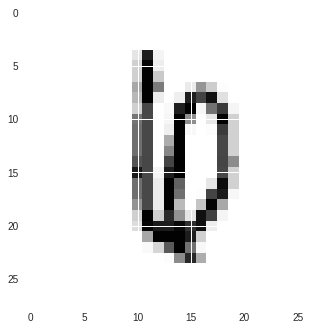

Label: [2]
Miss prediction: [7]


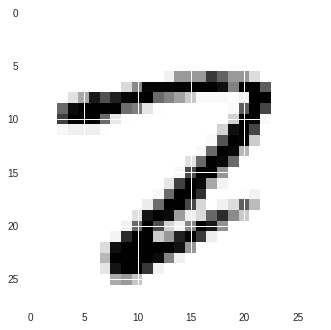

Label: [9]
Miss prediction: [3]


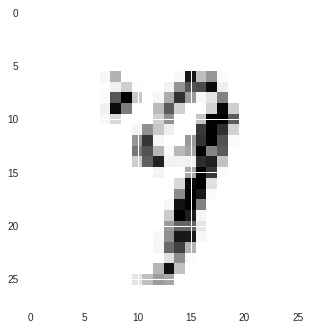

Label: [9]
Miss prediction: [1]


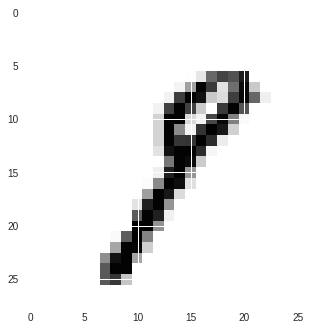

Label: [2]
Miss prediction: [3]


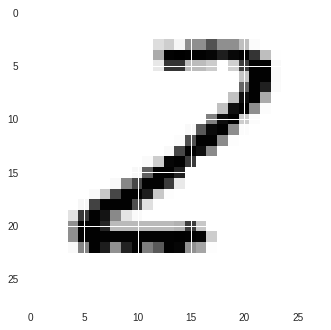

Label: [8]
Miss prediction: [5]


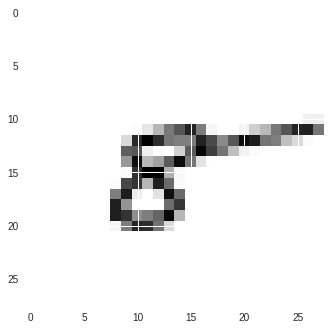

Label: [7]
Miss prediction: [9]


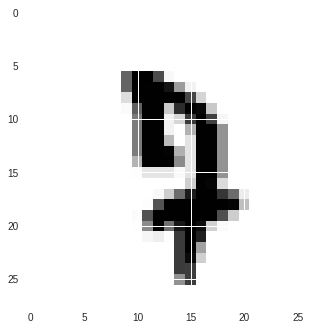

In [6]:
for i in range(500):
    r = random.randint(0, mnist.test.num_examples-1)
    label = sess.run(tf.argmax(mnist.test.labels[r:r+1],1))
    prediction = sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[r:r+1]})
    if (label != prediction):
        print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
        print("Miss prediction:", sess.run(tf.argmax(hypothesis,1),
                              feed_dict={X:mnist.test.images[r:r+1]}))
        plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation="nearest")
        plt.show()

In [7]:
#참고로 learning_rate=0.01로 위에랑 똑같이 했더니 local minimum에 빠졌는지 cost가 0.33언저리에서 벗어나지 못함
#위 code보다 2 layers가 추가되었으니 learning_rate를 더 적게 해야하나봄..
#learning_rate=0.001로 다시시도 -> 학습 잘됨
tf.reset_default_graph() # Xavier 가중치 초기 에러 방지 
X = tf.placeholder(tf.float32, [None, 784])
#conv2d를만들때는 img_data로 변환해서 input을 넣어줌
X_img = tf.reshape(X, [-1,28,28,1]) # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

#parameters
learning_rate=0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

#dropout (keep_prob) rate 0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

#L1 ImgIn shape=(?,28,28,1) (Layer1)
# 32Filters of 3x3x1
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
#Conv -> (?,28,28,1), Pool -> (?,14,14,32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
L1 = tf.nn.relu(L1) #back propagation이 잘되게하기위한 relu
#max_pool filter2x2x1, stride2x2x1 -> 14x14x1
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1],
                   strides=[1,2,2,1], padding="SAME")
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

#L2 ImgIn shape=(?,14,14,32)
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
#Conv -> (?,14,14,64), Pool -> (?,7,7,64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

#L3 ImgIn shape=(?,7,7,64)
W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
#Conv=(?,7,7,128), Pool=(?,4,4,128),
#Reshape=(?,4*4*128) <- Flatten them for FC input
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding="SAME")
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L3 = tf.nn.dropout(L3,keep_prob=keep_prob)

L3 = tf.reshape(L3, [-1, 4*4*128]) #Flatten them for FC input

#one more layer!!
#FC 4*4*128 inputs -> 625 outputs
W4 = tf.get_variable("W4",shape=[4*4*128,625],
                    initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3,W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

#L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5",shape=[625,10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4,W5) + b5

#defice cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess= tf.Session()
sess.run(tf.global_variables_initializer())

print("Learning started. It takes too much time..ㅠㅠ")
print("I should use tensorflow GPU...")
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys, keep_prob:0.7}
        c, _, =sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print("Epoch:","%04d"%(epoch+1), "cost =","{:.9f}".format(avg_cost))

print("Learning Finished!")

#Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict = {X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))

#이어서 학습하기 위한 변수들 저장
W1 = sess.run(W1)
W2 = sess.run(W2)
W3 = sess.run(W3)
W4 = sess.run(W4)
W5 = sess.run(W5)
b4 = sess.run(b4)
b5 = sess.run(b5)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Learning started. It takes too much time..ㅠㅠ
I should use tensorflow GPU...
Epoch: 0001 cost = 0.428742395
Epoch: 0002 cost = 0.093520182
Epoch: 0003 cost = 0.071310034
Epoch: 0004 cost = 0.057673108
Epoch: 0005 cost = 0.051015300
Epoch: 0006 cost = 0.044966285
Epoch: 0007 cost = 0.041450673
Epoch: 0008 cost = 0.038083122
Epoch: 0009 cost = 0.036448634
Epoch: 0010 cost = 0.031744977
Epoch: 0011 cost = 0.033947689
Epoch: 0012 cost = 0.029468706
Epoch: 0013 cost = 0.027406969
Epoch: 0014 cost = 0.025084634
Epoch: 0015 cost = 0.026896210
Learning Finished!
Accuracy: 0.9921


In [8]:
#위의 W1~W5,b4,b5값 받아서 학습해보기
X = tf.placeholder(tf.float32, [None, 784])
#conv2d를만들때는 img_data로 변환해서 input을 넣어줌
X_img = tf.reshape(X, [-1,28,28,1]) # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

#parameters
learning_rate=0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

#dropout (keep_prob) rate 0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

#L1 ImgIn shape=(?,28,28,1) (Layer1)
# 32Filters of 3x3x1
W1 = tf.Variable(W1)
#Conv -> (?,28,28,1), Pool -> (?,14,14,32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
L1 = tf.nn.relu(L1) #back propagation이 잘되게하기위한 relu
#max_pool filter2x2x1, stride2x2x1 -> 14x14x1
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1],
                   strides=[1,2,2,1], padding="SAME")
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

#L2 ImgIn shape=(?,14,14,32)
W2 = tf.Variable(W2)
#Conv -> (?,14,14,64), Pool -> (?,7,7,64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

#L3 ImgIn shape=(?,7,7,64)
W3 = tf.Variable(W3)
#Conv=(?,7,7,128), Pool=(?,4,4,128),
#Reshape=(?,4*4*128) <- Flatten them for FC input
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding="SAME")
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L3 = tf.nn.dropout(L3,keep_prob=keep_prob)

L3 = tf.reshape(L3, [-1, 4*4*128]) #Flatten them for FC input

#one more layer!!
#FC 4*4*128 inputs -> 625 outputs
W4 = tf.Variable(W4)
b4 = tf.Variable(b4)
L4 = tf.nn.relu(tf.matmul(L3,W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

#L5 Final FC 625 inputs -> 10 outputs
W5 = tf.Variable(W5)
b5 = tf.Variable(b5)
hypothesis = tf.matmul(L4,W5) + b5

#defice cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess= tf.Session()
sess.run(tf.global_variables_initializer())

print("Learning started. It takes too much time..ㅠㅠ")
print("I should use tensorflow GPU...")
print("total_batch:",total_batch)
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys, keep_prob:0.7}
        c, _, =sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print("Epoch:","%04d"%(epoch+1), "cost =","{:.9f}".format(avg_cost))

print("Learning Finished!")

#Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict = {X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))


Learning started. It takes too much time..ㅠㅠ
I should use tensorflow GPU...
total_batch: 550
Epoch: 0001 cost = 0.024953717
Epoch: 0002 cost = 0.024840532
Epoch: 0003 cost = 0.023215691
Epoch: 0004 cost = 0.023418319
Epoch: 0005 cost = 0.021919638
Epoch: 0006 cost = 0.021030313
Epoch: 0007 cost = 0.022448850
Epoch: 0008 cost = 0.020122628
Epoch: 0009 cost = 0.020062180
Epoch: 0010 cost = 0.017050376
Epoch: 0011 cost = 0.017451249
Epoch: 0012 cost = 0.016827167
Epoch: 0013 cost = 0.017759182
Epoch: 0014 cost = 0.017673951
Epoch: 0015 cost = 0.018765098
Learning Finished!
Accuracy: 0.9938
